In [ ]:
# %%html
# <script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);


# </script>


# <form action="javascript:code_toggle()"><input type="submit" value=" 
# Curso: Diseño y mantenimiento de instalaciones de energía solar fotovoltaica
# Alumno: Francisco Manuel Roman Gamez

# "></form>

In [2]:

# https://ec.europa.eu/jrc/en/PVGIS/docs/noninteractive
# https://ec.europa.eu/jrc/en/PVGIS/releases/pvgis51
# https://re.jrc.ec.europa.eu/pvg_tools/es/#MR

from flask import Flask, jsonify, render_template, request, session, json
import requests as requests
import pandas as pd # data wrangling
import datetime
from math import pi
import numpy as np
import matplotlib.pyplot as plt
# 

In [3]:
tuples=[(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0),(4,1),(5,0),(5,1)]
index=pd.MultiIndex.from_tuples(tuples)
p=[[-80,0],[-100,0],[-40,0],[-60,0],[-0,5],[-20,0],[0,10],[20,0],[40,0],[60,0],[80,0],[100,0]]

df=pd.DataFrame(p, index=index)
# df

st=pd.Series(0, index=np.arange(360))

In [4]:
# df
# df.loc[7]
# df.loc[7].at[0,0]

In [6]:
punto='5,1,82,20'
pp = pd.DataFrame([x.split(',') for x in punto.split('\n')])
pp=pp.astype(int)
# actualiza la tabla de puntos
df.loc[pp.at[0,0]].at[pp.at[0,1],0]=pp.at[0,2]
df.loc[pp.at[0,0]].at[pp.at[0,1],1]=pp.at[0,3]

In [7]:

p=df.values.tolist()
# p

In [8]:
def horizonte(p,df):
    dfp=df.loc[p,:]
    pp=dfp.values.tolist()
    pp.sort()
    pp=([-180,0],[pp[0][0]-1,0],pp[0],pp[1],[pp[1][0]+1,0],[180,0])
    ddf=pd.DataFrame(pp)
    ddf[0]=ddf[0]+180

    d = pd.Series(np.nan, index=np.arange(360))

    ii=ddf.index.tolist()
    for i in ii: 
        d.at[ddf.at[i,0]]=ddf.at[i,1]
    s=d.interpolate()
    return s
puntos=list(set(index.get_level_values(0)))
for p in puntos:
    s=horizonte(p,df)
    st=st.combine(s, max, 0)


In [9]:
lat='40';lon='-4'


In [10]:
hh=st.tolist()
hh = [round(x,2) for x in hh]
hh=hh[0:359]

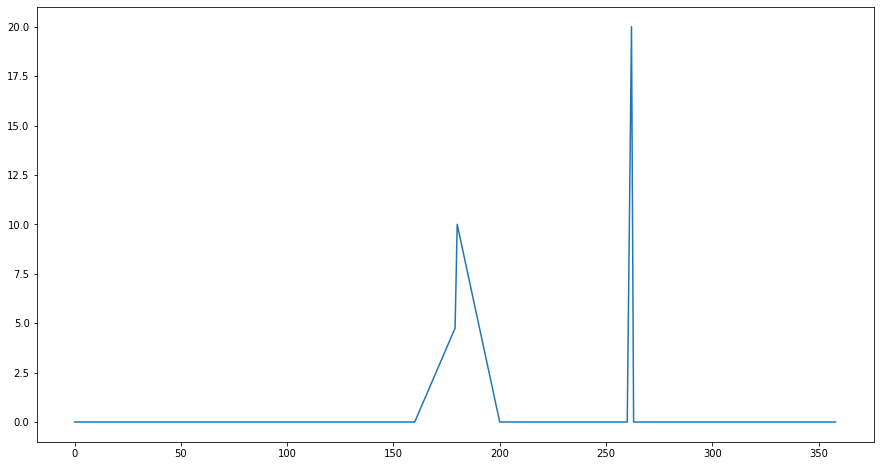

In [11]:
fig,ax=plt.subplots(figsize=(15,8))
ax.plot(hh)

In [12]:
# Calculos
# ????????????????   irraciacion
# url="https://re.jrc.ec.europa.eu/api/DRcalc?lat="+lat+"&lon="+lon+"&month="+mes+"&global=1"

url="https://re.jrc.ec.europa.eu/api/PVcalc?lat="+lat+"&lon="+lon+"&peakpower=1&loss=0"
url=url+"&angle=30" # angle Inclination angle from horizontal plane of the (fixed) PV system. 
url=url+"&aspect=44"    #Orientation (azimuth) angle of the (fixed) PV system, 0=south, 90=west, -90=east.
url=url+"&localtime=1"
url=url+"&outputformat=json"
# hh=[0,10,20,80,40,15,25,5]
url=url+"&userhorizon="+str(hh).strip('[]')
# print(url)
r = requests.get(url)

In [13]:
# hh


In [14]:
data = r.json()
E=data["outputs"]["totals"]["fixed"]["E_y"]
print(E)

1809.48


In [15]:
data = r.json()
j=data["outputs"]["totals"][]
# data
j

SyntaxError: invalid syntax (<ipython-input-15-a7a888127f81>, line 2)

In [ ]:
d = pd.Series(0, index=np.arange(359))
hh=d.tolist()

In [ ]:
# Calculos
# ????????????????   irraciacion
# url="https://re.jrc.ec.europa.eu/api/DRcalc?lat="+lat+"&lon="+lon+"&month="+mes+"&global=1"

url="https://re.jrc.ec.europa.eu/api/PVcalc?lat="+lat+"&lon="+lon+"&peakpower=1&loss=0"
    
url=url+"&localtime=1"
url=url+"&outputformat=json"
url=url+"&userhorizon="+str(hh).strip('[]')

# url=url+"&userhorizon="+str(hh).strip('[]')
# print(url)
r = requests.get(url)
data = r.json()
data
j=data["outputs"]["totals"]
j

In [ ]:
jf= json.dumps(j, indent=2)
df=pd.read_json(jf, orient='records') 
df.T

In [ ]:
# Calculos
# ????????????????   irraciacion
# url="https://re.jrc.ec.europa.eu/api/DRcalc?lat="+lat+"&lon="+lon+"&month="+mes+"&global=1"

url="https://re.jrc.ec.europa.eu/api/PVcalc?lat="+lat+"&lon="+lon+"&peakpower=1&loss=0"
    
url=url+"&localtime=1"
url=url+"&outputformat=json"
print(url)


In [ ]:
j=data["outputs"]["monthly"]["fixed"]
jf= json.dumps(j, indent=2)
df=pd.read_json(jf, orient='records') 
dfp=df
df=df.to_html()

# E=irradiacion
# E=850 para probar con los datos del idae

ax=dfp.plot(kind='bar',y=['E_m']);ax.set_ylabel("$MJ / m^2 * d$");
dfp

{{dfp}}